In [1]:
!pip install tensorflow_text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 28.5 MB/s 
     |████████████████████████████████| 588.3 MB 19 kB/s 
     |████████████████████████████████| 1.7 MB 57.9 MB/s 
     |████████████████████████████████| 439 kB 85.8 MB/s 
     |████████████████████████████████| 6.0 MB 56.5 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install -q tf-models-official

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization
import pandas as pd
import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

In [ ]:
dataframe=pd.read_csv('/content/drive/MyDrive/kaggle disaster Tweet/clean_train.csv')

In [ ]:
data=dataframe[dataframe['text'].notnull()]

In [ ]:
data

,text,label
0,ded reason may alah forgive u al,1
1,forest fire near la ronge sask canada,1
2,al resident asked shelter place notified ofice...,1
3,people receive evacuation order california,1
4,got sent photo ruby smoke pours schol,1
...,...,...
7239,wo giant crane holding bridge colapse nearby home,1
7240,control wild fire california even northern par...,1
7241,km volcano hawai,1
7242,police investigating e bike colided car litle ...,1


In [ ]:
dataframe.dropna(subset=['text'],inplace=True)

In [ ]:
dataframe['text'].isnull().sum()

0

In [ ]:
dataframe.describe()

,label
count,7244.000000
mean,0.440917
std,0.496531
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
dataframe.shape

(7244, 2)

In [ ]:
dataframe.head()

,text,label
0,ded reason may alah forgive u al,1
1,forest fire near la ronge sask canada,1
2,al resident asked shelter place notified ofice...,1
3,people receive evacuation order california,1
4,got sent photo ruby smoke pours schol,1


In [ ]:
train = dataframe.iloc[0:6800,:]
valid=dataframe.iloc[6700:7100,:]
test=dataframe.iloc[7100:,:]

In [ ]:
test.head()

,text,label
7100,court back sesion testimony continues med exam...,0
7101,uper arm frigin icicle projectile leg various ...,1
7102,explosion gaza strip kils four wound cause unk...,1
7103,sure covering head wound scab solution,0
7104,man gently dabed coton rag acros one wound pai...,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train=train['text'].values
X_val=valid['text'].values
y_train=train['label'].values
y_val=valid['label'].values

In [ ]:
test.text[0:1]

7100    court back sesion testimony continues med exam...
Name: text, dtype: object

In [ ]:
X_test = test.text.values
y_test = test.label.values

In [ ]:
train.head()

,text,label
0,ded reason may alah forgive u al,1
1,forest fire near la ronge sask canada,1
2,al resident asked shelter place notified ofice...,1
3,people receive evacuation order california,1
4,got sent photo ruby smoke pours schol,1


In [ ]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape,X_test.shape,y_test.shape

((6800,), (400,), (6800,), (400,), (144,), (144,))

In [ ]:
bert_model_name = 'bert_en_uncased_L-12_H-768_A-12'  #@param ["bert_en_uncased_L-12_H-768_A-12", "bert_en_cased_L-12_H-768_A-12", "bert_multi_cased_L-12_H-768_A-12", "small_bert/bert_en_uncased_L-2_H-128_A-2", "small_bert/bert_en_uncased_L-2_H-256_A-4", "small_bert/bert_en_uncased_L-2_H-512_A-8", "small_bert/bert_en_uncased_L-2_H-768_A-12", "small_bert/bert_en_uncased_L-4_H-128_A-2", "small_bert/bert_en_uncased_L-4_H-256_A-4", "small_bert/bert_en_uncased_L-4_H-512_A-8", "small_bert/bert_en_uncased_L-4_H-768_A-12", "small_bert/bert_en_uncased_L-6_H-128_A-2", "small_bert/bert_en_uncased_L-6_H-256_A-4", "small_bert/bert_en_uncased_L-6_H-512_A-8", "small_bert/bert_en_uncased_L-6_H-768_A-12", "small_bert/bert_en_uncased_L-8_H-128_A-2", "small_bert/bert_en_uncased_L-8_H-256_A-4", "small_bert/bert_en_uncased_L-8_H-512_A-8", "small_bert/bert_en_uncased_L-8_H-768_A-12", "small_bert/bert_en_uncased_L-10_H-128_A-2", "small_bert/bert_en_uncased_L-10_H-256_A-4", "small_bert/bert_en_uncased_L-10_H-512_A-8", "small_bert/bert_en_uncased_L-10_H-768_A-12", "small_bert/bert_en_uncased_L-12_H-128_A-2", "small_bert/bert_en_uncased_L-12_H-256_A-4", "small_bert/bert_en_uncased_L-12_H-512_A-8", "small_bert/bert_en_uncased_L-12_H-768_A-12", "albert_en_base", "electra_small", "electra_base", "experts_pubmed", "experts_wiki_books", "talking-heads_base"]

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
# Trying the preprocessing model on some text
text_test = ["court back sesion testimony continues med exam"]
# text_test = ["train canceled timetable changed three railway line starting june post flood work"]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_type_ids', 'input_word_ids', 'input_mask']
Shape      : (1, 128)
Word Ids   : [  101  2457  2067  7367 10992 10896  4247 19960 11360   102     0     0]
Input Mask : [1 1 1 1 1 1 1 1 1 1 0 0]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# Using BERT model
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Pooled Outputs Shape:(1, 768)
Pooled Outputs Values:[-0.4848792  -0.2068479  -0.02918513  0.14921536 -0.38582227 -0.00244466
  0.34041023  0.2350511   0.11190674 -0.9986083   0.16001779  0.14954972]
Sequence Outputs Shape:(1, 128, 768)
Sequence Outputs Values:[[-0.35507023 -0.32232502 -0.06724747 ...  0.11179516  0.09883354
   0.18786336]
 [ 0.01822151 -0.5929673   0.19246295 ...  0.03948095  0.7142448
  -0.23408945]
 [-0.27503407 -0.63884777  0.368361   ...  0.02395034  0.0256064
  -0.11603445]
 ...
 [ 1.0022948   0.24388808 -0.11169762 ...  0.33235043 -0.6628918
  -0.32852164]
 [-0.2378065  -0.53421676  0.25914413 ...  0.34857935 -0.17839569
  -0.22005315]
 [-0.21334237 -0.5138698   0.26569575 ...  0.36173138 -0.18026045
  -0.24659927]]


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocess')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name="BERT_encoder")
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1, name='dropout')(net)
  net = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(net)
  return tf.keras.Model(inputs=[text_input], outputs=[net])

In [ ]:
classifier_model = build_classifier_model()
bert_raw_result = classifier_model(tf.constant(text_test))
print(tf.sigmoid(bert_raw_result))

tf.Tensor([[0.67993885]], shape=(1, 1), dtype=float32)


In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

In [ ]:
batch_size = 16

In [ ]:
X_train

array(['ded reason may alah forgive u al',
       'forest fire near la ronge sask canada',
       'al resident asked shelter place notified oficers evacuation shelter place order expected',
       ..., 'live somewhere else da mil bad son',
       'km volcano hawai time utc ep',
       'la startup hot flower come straight volcano via'], dtype=object)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

In [ ]:
epochs = 10
steps_per_epoch = tf.data.experimental.cardinality(train_dataset).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 2e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 preprocess (KerasLayer)        {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:
classifier_model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x=train_dataset,
                               validation_data=val_dataset,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3
Epoch 1/10
425/425 [==============================] - 283s 629ms/step - loss: 0.6408 - accuracy: 0.6475 - precision: 0.5847 - recall: 0.6591 - val_loss: 0.4357 - val_accuracy: 0.8138 - val_precision: 0.8232 - val_recall: 0.7293
Epoch 2/10
425/425 [==============================] - 267s 627ms/step - loss: 0.4696 - accuracy: 0.7928 - precision: 0.8123 - recall: 0.6821 - val_loss: 0.3323 - val_accuracy: 0.8738 - val_precision: 0.8862 - val_recall: 0.8151
Epoch 3/10
425/425 [==============================] - 267s 629ms/step - loss: 0.3375 - accuracy: 0.8659 - precision: 0.8777 - recall: 0.8043 - val_loss: 0.2158 - val_accuracy: 0.9188 - val_precision: 0.9077 - val_recall: 0.9058
Epoch 4/10
425/425 [==============================] - 267s 628ms/step - loss: 0.2557 - accuracy: 0.9126 - precision: 0.9202 - recall: 0.8755 - val_loss: 0.1496 - val_accuracy: 0.9444 - val_precision: 0.9336 - val_recall: 0.9393
Epoch

In [ ]:
results = classifier_model.evaluate(test_dataset)

9/9 [==============================] - 2s 163ms/step - loss: 0.6646 - accuracy: 0.8819 - precision: 0.8861 - recall: 0.8974


In [ ]:
loss, accuracy, precision, recall = results

In [ ]:
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy*100}')
print(f'Precision: {precision*100}')
print(f'Recall: {recall*100}')
print(f'F1 Score: {((2*precision*recall)/(precision + recall))*100}')

Loss: 0.6645664572715759
Accuracy: 88.19444179534912
Precision: 88.60759735107422
Recall: 89.74359035491943
F1 Score: 89.17197604668618


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])


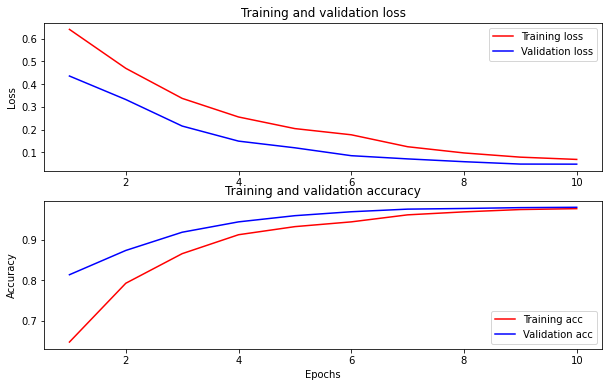

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('/content/drive/MyDrive/kaggle disaster Tweet/loss.png')
# plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('/content/drive/MyDrive/kaggle disaster Tweet/accuracy.png')
plt.legend(loc='lower right')

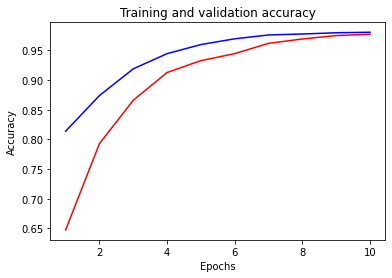

In [ ]:
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('/content/drive/MyDrive/kaggle disaster Tweet/accuracy.png')

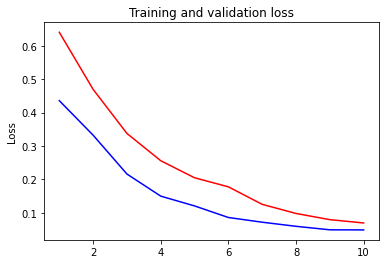

In [ ]:
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('/content/drive/MyDrive/kaggle disaster Tweet/loss.png')

## Evaluate Training Data

In [ ]:
y_predicted = classifier_model.predict(train_dataset)
y_predicted = y_predicted.flatten()

250/250 [==============================] - 41s 164ms/step


In [ ]:
y_predicted.shape,y_train.shape

((3985,), (3985,))

In [ ]:
import numpy as np
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
import numpy as np
y_train = np.where(y_train > 0.5, 1, 0)
y_train

array([1, 1, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_train, y_predicted)
cm

array([[2332,   36],
       [  10, 1607]])

Text(33.0, 0.5, 'Truth')

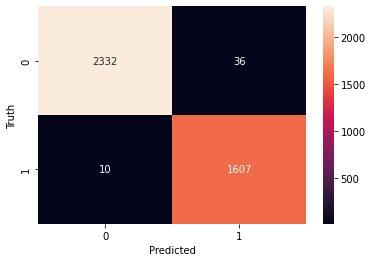

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Evaluate Test Data

In [ ]:
y_predicted = classifier_model.predict(test_dataset)
y_predicted = y_predicted.flatten()

50/50 [==============================] - 8s 159ms/step


In [ ]:
y_predicted

array([7.64220313e-05, 9.02923566e-05, 9.02923566e-05, 1.09300134e-03,
       1.53691290e-04, 7.64220313e-05, 1.03617494e-04, 9.92511392e-01,
       9.99517441e-01, 2.41041053e-04, 2.46007158e-03, 9.02923566e-05,
       1.77601643e-04, 3.22628736e-01, 1.29660009e-04, 1.78655362e-04,
       9.97859895e-01, 9.02923566e-05, 4.29789041e-04, 1.81728404e-03,
       9.02923566e-05, 2.41041053e-04, 1.06019135e-04, 6.30360970e-04,
       7.64220313e-05, 9.90721164e-05, 7.64220313e-05, 7.64220313e-05,
       5.14688389e-03, 9.98243332e-01, 9.99337852e-01, 7.65022996e-05,
       4.83558797e-05, 9.98736680e-01, 9.98890221e-01, 9.99409318e-01,
       3.62122664e-04, 9.99284804e-01, 9.97810543e-01, 6.07788934e-05,
       9.99506354e-01, 9.99378324e-01, 2.79401051e-04, 9.98930395e-01,
       7.64220313e-05, 1.86260935e-04, 9.97982144e-01, 9.98846650e-01,
       5.07359564e-01, 9.98713970e-01, 9.99192178e-01, 9.98640478e-01,
       9.99459445e-01, 9.59122717e-01, 9.99155045e-01, 7.64220313e-05,
      

In [ ]:
import numpy as np
y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [ ]:
df = pd.DataFrame()
  
print(df)

Empty DataFrame
Columns: []
Index: []


In [ ]:
df.head()

""


In [ ]:
df['bert_predictions']=y_predicted

In [ ]:
unique_elements, counts_elements = np.unique(y_predicted, return_counts=True)

In [ ]:
unique_elements

array([0, 1])

In [ ]:
counts_elements

array([448, 343])

In [ ]:
y_predicted_raw = classifier_model.predict(test_dataset)
y_predicted_raw = y_predicted_raw.flatten()

predictions_poss = y_predicted_raw
predictions_neg = (1 - y_predicted_raw)
predictions_poss.shape

50/50 [==============================] - 8s 160ms/step


(791,)

In [ ]:
predictions_poss

array([7.64220313e-05, 9.02923566e-05, 9.02923566e-05, 1.09300134e-03,
       1.53691290e-04, 7.64220313e-05, 1.03617494e-04, 9.92511392e-01,
       9.99517441e-01, 2.41041053e-04, 2.46007158e-03, 9.02923566e-05,
       1.77601643e-04, 3.22628736e-01, 1.29660009e-04, 1.78655362e-04,
       9.97859895e-01, 9.02923566e-05, 4.29789041e-04, 1.81728404e-03,
       9.02923566e-05, 2.41041053e-04, 1.06019135e-04, 6.30360970e-04,
       7.64220313e-05, 9.90721164e-05, 7.64220313e-05, 7.64220313e-05,
       5.14688389e-03, 9.98243332e-01, 9.99337852e-01, 7.65022996e-05,
       4.83558797e-05, 9.98736680e-01, 9.98890221e-01, 9.99409318e-01,
       3.62122664e-04, 9.99284804e-01, 9.97810543e-01, 6.07788934e-05,
       9.99506354e-01, 9.99378324e-01, 2.79401051e-04, 9.98930395e-01,
       7.64220313e-05, 1.86260935e-04, 9.97982144e-01, 9.98846650e-01,
       5.07359564e-01, 9.98713970e-01, 9.99192178e-01, 9.98640478e-01,
       9.99459445e-01, 9.59122717e-01, 9.99155045e-01, 7.64220313e-05,
      

In [ ]:
predictions_neg

array([9.99923587e-01, 9.99909699e-01, 9.99909699e-01, 9.98906970e-01,
       9.99846280e-01, 9.99923587e-01, 9.99896407e-01, 7.48860836e-03,
       4.82559204e-04, 9.99758959e-01, 9.97539937e-01, 9.99909699e-01,
       9.99822378e-01, 6.77371264e-01, 9.99870360e-01, 9.99821365e-01,
       2.14010477e-03, 9.99909699e-01, 9.99570191e-01, 9.98182714e-01,
       9.99909699e-01, 9.99758959e-01, 9.99893963e-01, 9.99369621e-01,
       9.99923587e-01, 9.99900937e-01, 9.99923587e-01, 9.99923587e-01,
       9.94853139e-01, 1.75666809e-03, 6.62147999e-04, 9.99923527e-01,
       9.99951661e-01, 1.26332045e-03, 1.10977888e-03, 5.90682030e-04,
       9.99637902e-01, 7.15196133e-04, 2.18945742e-03, 9.99939203e-01,
       4.93645668e-04, 6.21676445e-04, 9.99720573e-01, 1.06960535e-03,
       9.99923587e-01, 9.99813735e-01, 2.01785564e-03, 1.15334988e-03,
       4.92640436e-01, 1.28602982e-03, 8.07821751e-04, 1.35952234e-03,
       5.40554523e-04, 4.08772826e-02, 8.44955444e-04, 9.99923587e-01,
      

In [ ]:
df['bert_poss'] = predictions_poss.tolist()

In [ ]:
df['bert_neg'] = predictions_neg.tolist()

In [ ]:
df.head()

,bert_predictions,bert_poss,bert_neg
0,0,0.000076,0.999924
1,0,0.000090,0.999910
2,0,0.000090,0.999910
3,0,0.001093,0.998907
4,0,0.000154,0.999846


In [ ]:
df.bert_predictions.value_counts()

0    448
1    343
Name: bert_predictions, dtype: int64

In [ ]:
df.to_csv('/content/drive/MyDrive/MediaEval/DisasterMM/data/model_results.csv')

FileNotFoundError: ignored

In [ ]:
df.bert_predictions

0      0
1      0
2      0
3      0
4      0
      ..
786    0
787    1
788    1
789    0
790    0
Name: bert_predictions, Length: 791, dtype: int64

In [ ]:
# import numpy as np
# y_test = np.where(y_test > 0.5, 1, 0)
# y_test

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[432,  39],
       [ 16, 304]])

Text(33.0, 0.5, 'Truth')

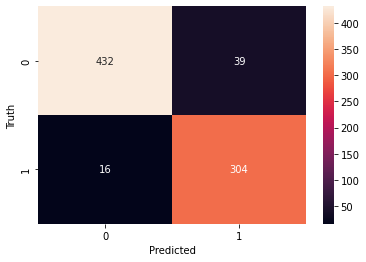

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
print(classification_report(y_test, y_predicted))
print(accuracy_score(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       471
           1       0.89      0.95      0.92       320

    accuracy                           0.93       791
   macro avg       0.93      0.93      0.93       791
weighted avg       0.93      0.93      0.93       791

0.9304677623261695
